In [1]:
!git clone https://github.com/manu-mannattil/nolitsa.git
!pip install ./nolitsa

fatal: destination path 'nolitsa' already exists and is not an empty directory.
Processing ./nolitsa
  Created wheel for nolitsa: filename=nolitsa-0.1-cp37-none-any.whl size=31147 sha256=01f9b7ee9cd30fdcb85defac062b6ca9bb233d7cef9da9807ca92ddc513f22c8
  Stored in directory: /tmp/pip-ephem-wheel-cache-idyddkr1/wheels/ef/83/6f/9be4bae2da9371b6a28d28f25804a0a25f6569195622539f43
Successfully built nolitsa
  Found existing installation: nolitsa 0.1
    Uninstalling nolitsa-0.1:
      Successfully uninstalled nolitsa-0.1


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/adm1

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/adm1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.graphics import tsaplots
from nolitsa import dimension, delay, noise

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# def getAmi(x, nBins, maxLag):
#     ami = np.zeros((maxLag + 1,))
#     marginalProbs, intervals = np.histogram(x, bins=nBins, density=True)
#     xOriginal = np.copy(x)
#     for delay in range(maxLag + 1):
#         xDelayed = np.roll(xOriginal, shift=delay)[delay:]
#         x = xOriginal[delay:]
#         jointProbs, intervalsX, intervalsY = np.histogram2d(x, xDelayed, bins=nBins, density=True)

#         for i in range(nBins):
#             for j in range(nBins):
#                 if marginalProbs[i] != 0 and marginalProbs[j] != 0 and jointProbs[i, j] != 0:
#                     ami[delay] = ami[delay] + jointProbs[i, j] * np.log(jointProbs[i, j] / (marginalProbs[i] *
#                                                                                         marginalProbs[j]))
#     return ami

In [5]:
def localmin(x):
    """Return all local minima from the given data set.
    Returns all local minima from the given data set.  Note that even
    "kinky" minima (which are probably not real minima) will be
    returned.
    Parameters
    ----------
    x : array
        1D scalar data set.
    Returns
    -------
    i : array
        Array containing location of all local minima.
    """
    return (np.diff(np.sign(np.diff(x))) > 0).nonzero()[0] + 1

# Lorenz system

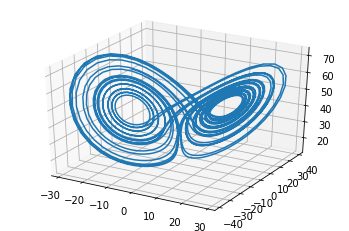

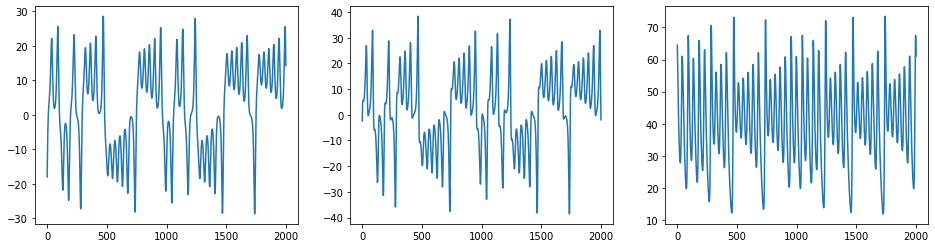

In [6]:
from nolitsa import data

dataLorenz = data.lorenz(length=2000, sigma=16.0, beta=4.0, rho=45.92, sample=0.01)[1]
x = dataLorenz[:, 0]
y = dataLorenz[:, 1]
z = dataLorenz[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)

plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
plt.plot(x)
plt.subplot(1, 3, 2)
plt.plot(y)
plt.subplot(1, 3, 3)
plt.plot(z)

Minima of delayed mutual information = [10 36 56 78 89]
Autocorrelation time = 21


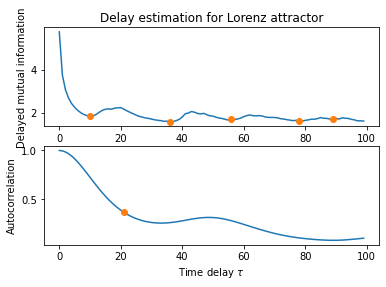

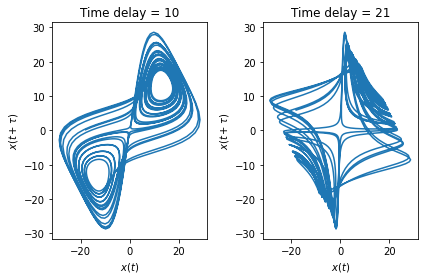

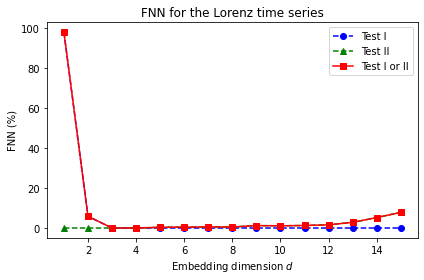

In [7]:
timeSeries = x
# Compute autocorrelation and delayed mutual information.
lag = np.arange(100)
r = delay.acorr(timeSeries, maxtau=100)
i = delay.dmi(timeSeries, maxtau=100, bins=64)
# While looking for local minima in the DMI curve, it's useful to do an
# SMA to remove "kinky" minima.
i_delay = localmin(noise.sma(i, hwin=1)) + 1
r_delay = np.argmax(r < 1.0 / np.e)
print(r'Minima of delayed mutual information = %s' % i_delay)
print(r'Autocorrelation time = %d' % r_delay)
plt.figure(1)
plt.subplot(211)
plt.title(r'Delay estimation for Lorenz attractor')
plt.ylabel(r'Delayed mutual information')
plt.plot(lag, i, i_delay, i[i_delay], 'o')
plt.subplot(212)
plt.xlabel(r'Time delay $\tau$')
plt.ylabel(r'Autocorrelation')
plt.plot(lag, r, r_delay, r[r_delay], 'o')
plt.figure(2)
plt.subplot(121)
plt.title(r'Time delay = %d' % i_delay[0])
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(timeSeries[:-i_delay[0]], timeSeries[i_delay[0]:])
plt.subplot(122)
plt.title(r'Time delay = %d' % r_delay)
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(timeSeries[:-r_delay], timeSeries[r_delay:])
plt.tight_layout()
plt.show()

dim = np.arange(1, 16)
f1, f2, f3 = dimension.fnn(np.nan_to_num(timeSeries), tau=i_delay[0], dim=dim, window=200, metric='euclidean', A=3.0)
plt.title(r'FNN for the Lorenz time series')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'FNN (%)')
plt.plot(dim, 100 * f1, 'bo--', label=r'Test I')
plt.plot(dim, 100 * f2, 'g^--', label=r'Test II')
plt.plot(dim, 100 * f3, 'rs-', label=r'Test I or II')
plt.legend()

plt.tight_layout()
plt.show()

# Brownian motion

Minima of delayed mutual information = [27 33 41 52 57 63 69 81 91]
Autocorrelation time = 57


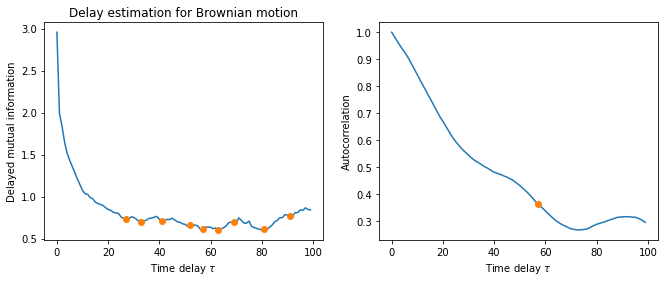

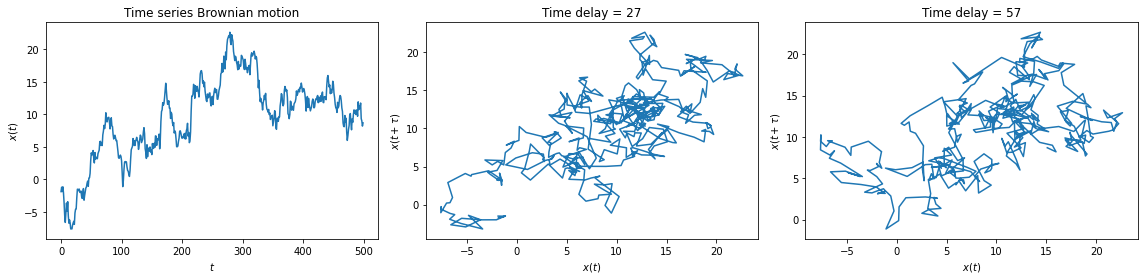

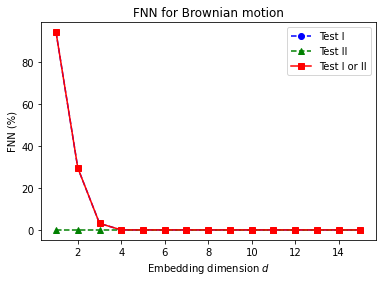

In [11]:
maxLag = 100
numBins = 10
startIdx = 0
timeSeries = np.cumsum(np.random.normal(size=500))
timeSeries = timeSeries[np.where(~np.isnan(timeSeries))[0]]
# Compute autocorrelation and delayed mutual information.
lag = np.arange(maxLag)
r = delay.acorr(timeSeries, maxtau=maxLag)
i = delay.dmi(timeSeries, maxtau=maxLag, bins=numBins)
# While looking for local minima in the DMI curve, it's useful to do an
# SMA to remove "kinky" minima.
i_delay = localmin(noise.sma(i, hwin=1)) + 1
r_delay = np.argmax(r < 1.0 / np.e)
print(r'Minima of delayed mutual information = %s' % i_delay)
print(r'Autocorrelation time = %d' % r_delay)
plt.figure(1, figsize=(11, 4))
plt.subplot(121)
plt.title(f'Delay estimation for Brownian motion')
plt.xlabel(r'Time delay $\tau$')
plt.ylabel(r'Delayed mutual information')
plt.plot(lag, i, i_delay, i[i_delay], 'o')
plt.subplot(122)
plt.xlabel(r'Time delay $\tau$')
plt.ylabel(r'Autocorrelation')
plt.plot(lag, r, r_delay, r[r_delay], 'o')
plt.figure(2, figsize=(16, 4))
plt.subplot(131)
plt.plot(timeSeries[startIdx:])
plt.title(f'Time series Brownian motion')
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.subplot(132)
plt.title(r'Time delay = %d' % i_delay[0])
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(timeSeries[:-i_delay[0]], timeSeries[i_delay[0]:])
plt.subplot(133)
plt.title(r'Time delay = %d' % r_delay)
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(timeSeries[:-r_delay], timeSeries[r_delay:])
plt.tight_layout()
plt.show()

dim = np.arange(1, 16)
f1, f2, f3 = dimension.fnn(np.nan_to_num(timeSeries[startIdx:]), tau=i_delay[0], dim=dim, window=6, metric='euclidean', A=3.0)

plt.title(f'FNN for Brownian motion')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'FNN (%)')
plt.plot(dim, 100 * f1, 'bo--', label=r'Test I')
plt.plot(dim, 100 * f2, 'g^--', label=r'Test II')
plt.plot(dim, 100 * f3, 'rs-', label=r'Test I or II')
plt.legend()

plt.show()

# Covid19

In [12]:
data = pd.read_csv('owid-covid-data.csv')
data['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [13]:
data = data[data['location'] == 'Poland']

In [14]:
maxLag = 100
numBins = 10
startIdx = 0

## Covid19 new daily cases

Minima of delayed mutual information = [ 4 11 17 19 26 30 36 38 41 50 57 72 75 80 82 89 94]
Autocorrelation time = 30


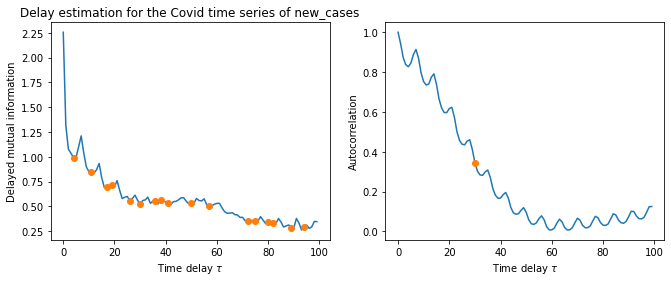

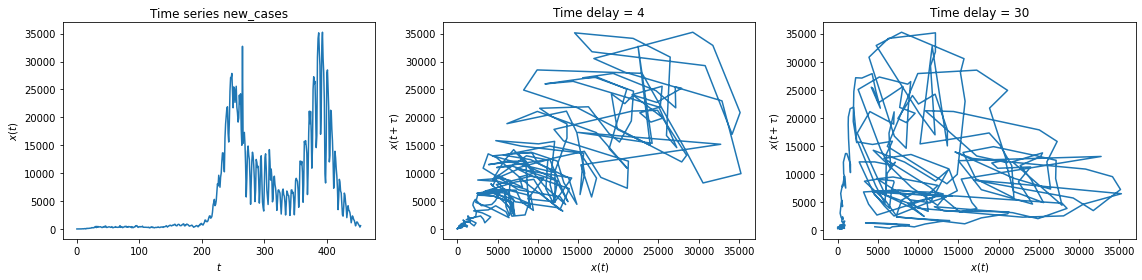

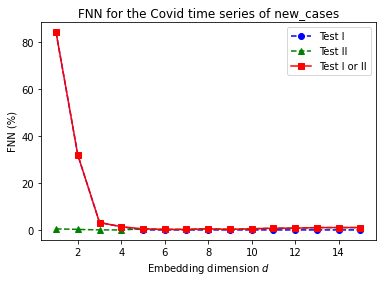

In [15]:
variable  = 'new_cases'
timeSeries = data[variable].values
timeSeries = timeSeries[np.where(~np.isnan(timeSeries))[0]]
# Compute autocorrelation and delayed mutual information.
lag = np.arange(maxLag)
r = delay.acorr(timeSeries, maxtau=maxLag)
i = delay.dmi(timeSeries, maxtau=maxLag, bins=numBins)
# While looking for local minima in the DMI curve, it's useful to do an
# SMA to remove "kinky" minima.
i_delay = localmin(noise.sma(i, hwin=1)) + 1
r_delay = np.argmax(r < 1.0 / np.e)
print(r'Minima of delayed mutual information = %s' % i_delay)
print(r'Autocorrelation time = %d' % r_delay)
plt.figure(1, figsize=(11, 4))
plt.subplot(121)
plt.title(f'Delay estimation for the Covid time series of {variable}')
plt.xlabel(r'Time delay $\tau$')
plt.ylabel(r'Delayed mutual information')
plt.plot(lag, i, i_delay, i[i_delay], 'o')
plt.subplot(122)
plt.xlabel(r'Time delay $\tau$')
plt.ylabel(r'Autocorrelation')
plt.plot(lag, r, r_delay, r[r_delay], 'o')
plt.figure(2, figsize=(16, 4))
plt.subplot(131)
plt.plot(timeSeries[startIdx:])
plt.title(f'Time series {variable}')
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.subplot(132)
plt.title(r'Time delay = %d' % i_delay[0])
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(timeSeries[:-i_delay[0]], timeSeries[i_delay[0]:])
plt.subplot(133)
plt.title(r'Time delay = %d' % r_delay)
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(timeSeries[:-r_delay], timeSeries[r_delay:])
plt.tight_layout()
plt.show()

dim = np.arange(1, 16)
f1, f2, f3 = dimension.fnn(np.nan_to_num(timeSeries[startIdx:]), tau=i_delay[0], dim=dim, window=6, metric='euclidean', A=3.0)

plt.title(f'FNN for the Covid time series of {variable}')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'FNN (%)')
plt.plot(dim, 100 * f1, 'bo--', label=r'Test I')
plt.plot(dim, 100 * f2, 'g^--', label=r'Test II')
plt.plot(dim, 100 * f3, 'rs-', label=r'Test I or II')
plt.legend()

plt.show()

## Covid19 new daily deaths

Minima of delayed mutual information = [ 4 11 18 25 32 39 46 53 60 66 73 80 87 95]
Autocorrelation time = 24


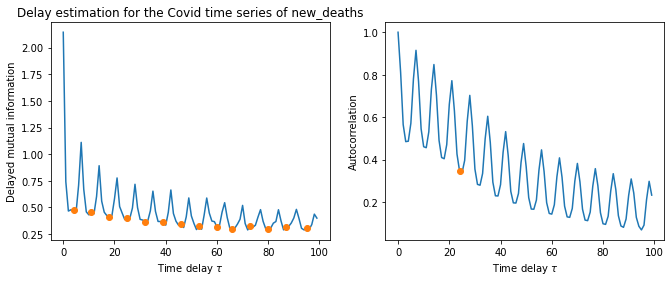

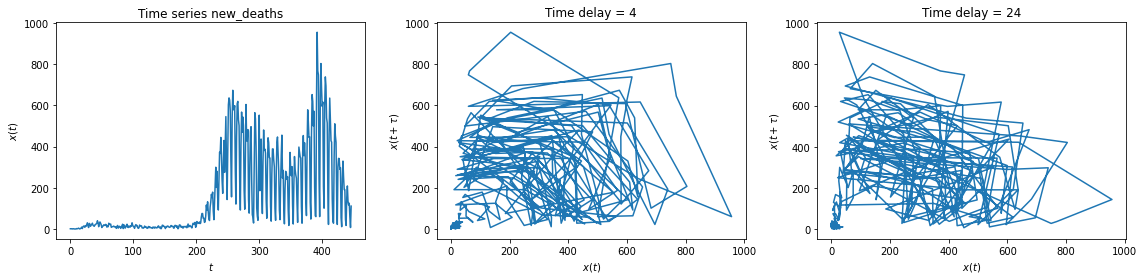

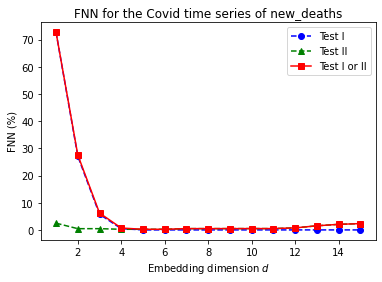

In [16]:
variable  = 'new_deaths'
timeSeries = data[variable].values
timeSeries = timeSeries[np.where(~np.isnan(timeSeries))[0]]
# Compute autocorrelation and delayed mutual information.
lag = np.arange(maxLag)
r = delay.acorr(timeSeries, maxtau=maxLag)
i = delay.dmi(timeSeries, maxtau=maxLag, bins=numBins)
# While looking for local minima in the DMI curve, it's useful to do an
# SMA to remove "kinky" minima.
i_delay = localmin(noise.sma(i, hwin=1)) + 1
r_delay = np.argmax(r < 1.0 / np.e)
print(r'Minima of delayed mutual information = %s' % i_delay)
print(r'Autocorrelation time = %d' % r_delay)
plt.figure(1, figsize=(11, 4))
plt.subplot(121)
plt.title(f'Delay estimation for the Covid time series of {variable}')
plt.xlabel(r'Time delay $\tau$')
plt.ylabel(r'Delayed mutual information')
plt.plot(lag, i, i_delay, i[i_delay], 'o')
plt.subplot(122)
plt.xlabel(r'Time delay $\tau$')
plt.ylabel(r'Autocorrelation')
plt.plot(lag, r, r_delay, r[r_delay], 'o')
plt.figure(2, figsize=(16, 4))
plt.subplot(131)
plt.plot(timeSeries[startIdx:])
plt.title(f'Time series {variable}')
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.subplot(132)
plt.title(r'Time delay = %d' % i_delay[0])
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(timeSeries[:-i_delay[0]], timeSeries[i_delay[0]:])
plt.subplot(133)
plt.title(r'Time delay = %d' % r_delay)
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(timeSeries[:-r_delay], timeSeries[r_delay:])
plt.tight_layout()
plt.show()

dim = np.arange(1, 16)
f1, f2, f3 = dimension.fnn(np.nan_to_num(timeSeries[startIdx:]), tau=i_delay[0], dim=dim, window=6, metric='euclidean', A=3.0)

plt.title(f'FNN for the Covid time series of {variable}')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'FNN (%)')
plt.plot(dim, 100 * f1, 'bo--', label=r'Test I')
plt.plot(dim, 100 * f2, 'g^--', label=r'Test II')
plt.plot(dim, 100 * f3, 'rs-', label=r'Test I or II')
plt.legend()

plt.show()

## Covid19 new daily tests

Minima of delayed mutual information = [ 4 11 18 25 32 39 46 53 60 66 73 80 87 94]
Autocorrelation time = 32


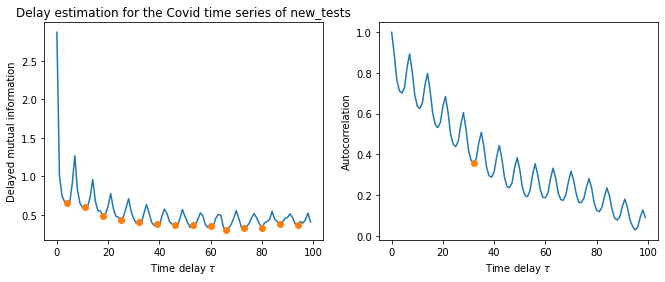

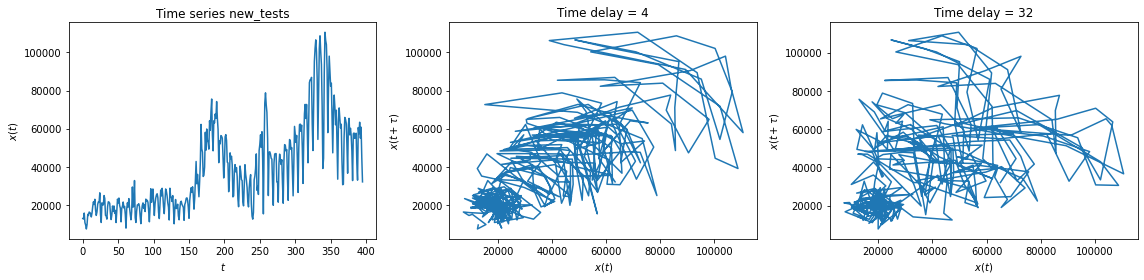

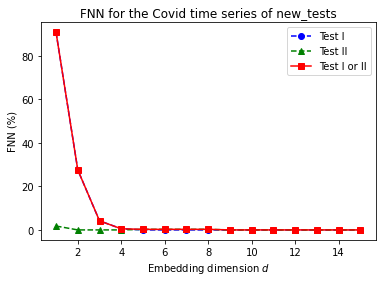

In [17]:
variable  = 'new_tests'
timeSeries = data[variable].values
timeSeries[331] = timeSeries[330]
timeSeries[332] = timeSeries[333]
timeSeries = timeSeries[np.where(~np.isnan(timeSeries))[0]]
# Compute autocorrelation and delayed mutual information.
lag = np.arange(maxLag)
r = delay.acorr(timeSeries, maxtau=maxLag)
i = delay.dmi(timeSeries, maxtau=maxLag, bins=numBins)
# While looking for local minima in the DMI curve, it's useful to do an
# SMA to remove "kinky" minima.
i_delay = localmin(noise.sma(i, hwin=1)) + 1
r_delay = np.argmax(r < 1.0 / np.e)
print(r'Minima of delayed mutual information = %s' % i_delay)
print(r'Autocorrelation time = %d' % r_delay)
plt.figure(1, figsize=(11, 4))
plt.subplot(121)
plt.title(f'Delay estimation for the Covid time series of {variable}')
plt.xlabel(r'Time delay $\tau$')
plt.ylabel(r'Delayed mutual information')
plt.plot(lag, i, i_delay, i[i_delay], 'o')
plt.subplot(122)
plt.xlabel(r'Time delay $\tau$')
plt.ylabel(r'Autocorrelation')
plt.plot(lag, r, r_delay, r[r_delay], 'o')
plt.figure(2, figsize=(16, 4))
plt.subplot(131)
plt.plot(timeSeries[startIdx:])
plt.title(f'Time series {variable}')
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.subplot(132)
plt.title(r'Time delay = %d' % i_delay[0])
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(timeSeries[:-i_delay[0]], timeSeries[i_delay[0]:])
plt.subplot(133)
plt.title(r'Time delay = %d' % r_delay)
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(timeSeries[:-r_delay], timeSeries[r_delay:])
plt.tight_layout()
plt.show()

dim = np.arange(1, 16)
f1, f2, f3 = dimension.fnn(np.nan_to_num(timeSeries[startIdx:]), tau=i_delay[0], dim=dim, window=6, metric='euclidean', A=3.0)

plt.title(f'FNN for the Covid time series of {variable}')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'FNN (%)')
plt.plot(dim, 100 * f1, 'bo--', label=r'Test I')
plt.plot(dim, 100 * f2, 'g^--', label=r'Test II')
plt.plot(dim, 100 * f3, 'rs-', label=r'Test I or II')
plt.legend()

plt.show()

## Covid19 growth rate (weekly running average)

Minima of delayed mutual information = [27 42 53 63 70 79 84 94]
Autocorrelation time = 19


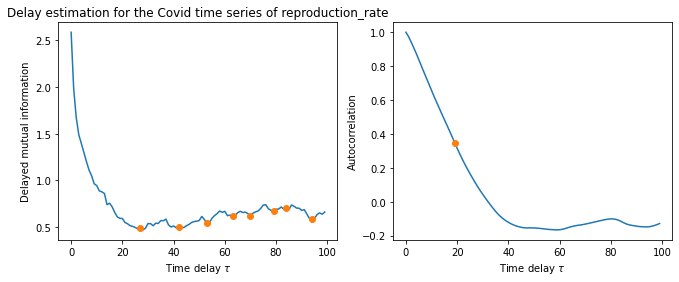

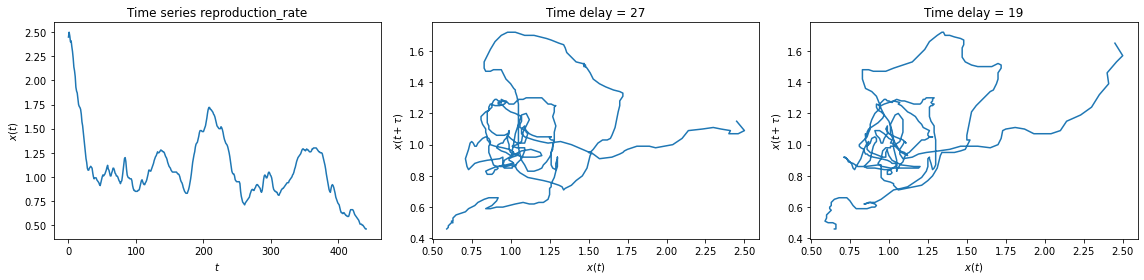

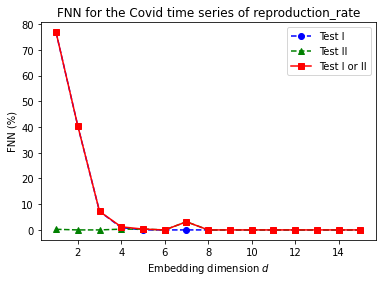

In [18]:
variable  = 'reproduction_rate'
timeSeries = data[variable].values
timeSeries = timeSeries[np.where(~np.isnan(timeSeries))[0]]
# Compute autocorrelation and delayed mutual information.
lag = np.arange(maxLag)
r = delay.acorr(timeSeries, maxtau=maxLag)
i = delay.dmi(timeSeries, maxtau=maxLag, bins=numBins)
# While looking for local minima in the DMI curve, it's useful to do an
# SMA to remove "kinky" minima.
i_delay = localmin(noise.sma(i, hwin=1)) + 1
r_delay = np.argmax(r < 1.0 / np.e)
print(r'Minima of delayed mutual information = %s' % i_delay)
print(r'Autocorrelation time = %d' % r_delay)
plt.figure(1, figsize=(11, 4))
plt.subplot(121)
plt.title(f'Delay estimation for the Covid time series of {variable}')
plt.xlabel(r'Time delay $\tau$')
plt.ylabel(r'Delayed mutual information')
plt.plot(lag, i, i_delay, i[i_delay], 'o')
plt.subplot(122)
plt.xlabel(r'Time delay $\tau$')
plt.ylabel(r'Autocorrelation')
plt.plot(lag, r, r_delay, r[r_delay], 'o')
plt.figure(2, figsize=(16, 4))
plt.subplot(131)
plt.plot(timeSeries[startIdx:])
plt.title(f'Time series {variable}')
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.subplot(132)
plt.title(r'Time delay = %d' % i_delay[0])
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(timeSeries[:-i_delay[0]], timeSeries[i_delay[0]:])
plt.subplot(133)
plt.title(r'Time delay = %d' % r_delay)
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(timeSeries[:-r_delay], timeSeries[r_delay:])
plt.tight_layout()
plt.show()

dim = np.arange(1, 16)
f1, f2, f3 = dimension.fnn(np.nan_to_num(timeSeries[startIdx:]), tau=i_delay[0], dim=dim, window=6, metric='euclidean', A=3.0)

plt.title(f'FNN for the Covid time series of {variable}')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'FNN (%)')
plt.plot(dim, 100 * f1, 'bo--', label=r'Test I')
plt.plot(dim, 100 * f2, 'g^--', label=r'Test II')
plt.plot(dim, 100 * f3, 'rs-', label=r'Test I or II')
plt.legend()

plt.show()

## Covid19 daily growth rate

Minima of delayed mutual information = [ 4 10 17 19 24 31 39 45 52 58 66 73 80 87 94]
Autocorrelation time = 1


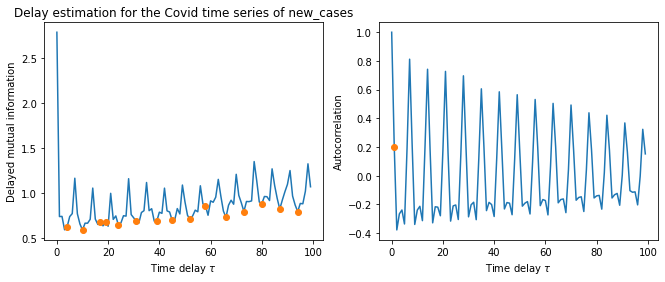

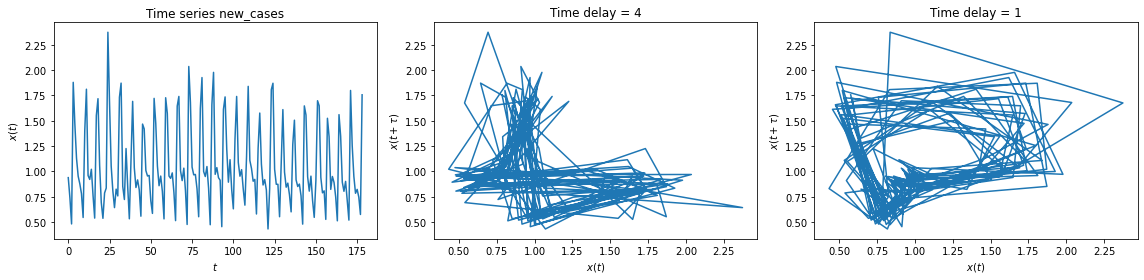

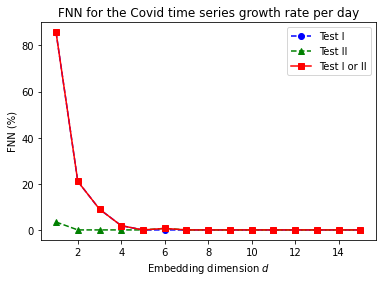

In [19]:
variable  = 'new_cases'
x = data[variable].values[275:]
x[x == 0] = 1.0
timeSeries = x[1:] / x[:-1]
timeSeries = timeSeries[np.where(~np.isnan(timeSeries))[0]]
# Compute autocorrelation and delayed mutual information.
lag = np.arange(maxLag)
r = delay.acorr(timeSeries, maxtau=maxLag)
i = delay.dmi(timeSeries, maxtau=maxLag, bins=numBins)
# While looking for local minima in the DMI curve, it's useful to do an
# SMA to remove "kinky" minima.
i_delay = localmin(noise.sma(i, hwin=1)) + 1
r_delay = np.argmax(r < 1.0 / np.e)
print(r'Minima of delayed mutual information = %s' % i_delay)
print(r'Autocorrelation time = %d' % r_delay)
plt.figure(1, figsize=(11, 4))
plt.subplot(121)
plt.title(f'Delay estimation for the Covid time series of {variable}')
plt.xlabel(r'Time delay $\tau$')
plt.ylabel(r'Delayed mutual information')
plt.plot(lag, i, i_delay, i[i_delay], 'o')
plt.subplot(122)
plt.xlabel(r'Time delay $\tau$')
plt.ylabel(r'Autocorrelation')
plt.plot(lag, r, r_delay, r[r_delay], 'o')
plt.figure(2, figsize=(16, 4))
plt.subplot(131)
plt.plot(timeSeries[startIdx:])
plt.title(f'Time series {variable}')
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.subplot(132)
plt.title(r'Time delay = %d' % i_delay[0])
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(timeSeries[:-i_delay[0]], timeSeries[i_delay[0]:])
plt.subplot(133)
plt.title(r'Time delay = %d' % r_delay)
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(timeSeries[:-r_delay], timeSeries[r_delay:])
plt.tight_layout()
plt.show()

dim = np.arange(1, 16)
f1, f2, f3 = dimension.fnn(np.nan_to_num(timeSeries[startIdx:]), tau=i_delay[0], dim=dim, window=6, metric='euclidean', A=3.0)

plt.title(f'FNN for the Covid time series growth rate per day')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'FNN (%)')
plt.plot(dim, 100 * f1, 'bo--', label=r'Test I')
plt.plot(dim, 100 * f2, 'g^--', label=r'Test II')
plt.plot(dim, 100 * f3, 'rs-', label=r'Test I or II')
plt.legend()

plt.show()

# Wavelets

In [20]:
from pywt import wavedec, waverec

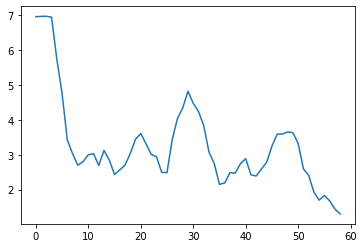

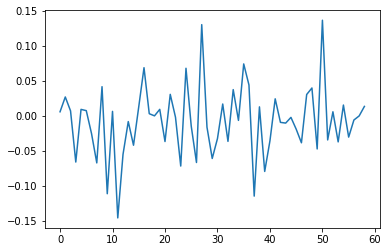

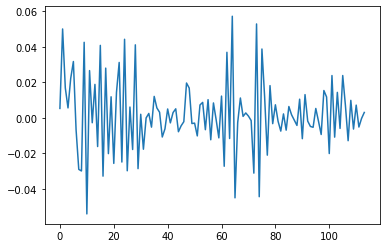

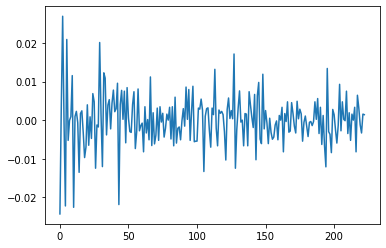

In [21]:
variable  = 'reproduction_rate'
timeSeries = data[variable].values
timeSeries = timeSeries[np.where(~np.isnan(timeSeries))[0]]
coeffs = wavedec(timeSeries, 'db3', level=3)
for coeff in coeffs:
    plt.figure()
    plt.plot(coeff)

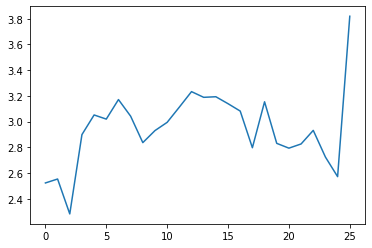

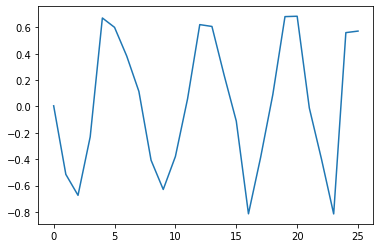

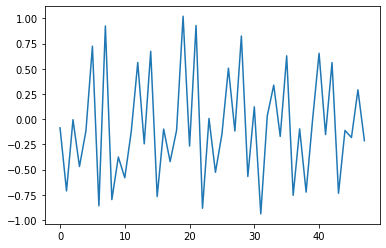

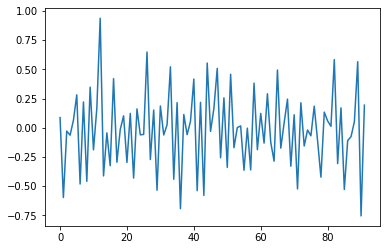

In [22]:
variable  = 'new_cases'
x = data[variable].values[275:]
x[x == 0] = 1.0
timeSeries = x[1:] / x[:-1]
timeSeries = timeSeries[np.where(~np.isnan(timeSeries))[0]]
coeffs = wavedec(timeSeries, 'db3', level=3)
for coeff in coeffs:
    plt.figure()
    plt.plot(coeff)

# Preparing the data

In [44]:
def series2AutoRegressiveDataset(series, numFeatures, delay):
    dataset = []
    seriesLength = len(series)
    for i in range(seriesLength - numFeatures * delay - 1):
        sequence = []
        for j in range(numFeatures):
            sequence.append(series[i + j*delay])
        label = series[i + (numFeatures - 1) * delay + 1]
        dataset.append((sequence, label))
    return dataset

variable  = 'reproduction_rate'
timeSeries = data[variable].values
timeSeries = timeSeries[np.where(~np.isnan(timeSeries))[0]]
dataset = series2ARDataset(timeSeries, 8, 4)